<a href="https://colab.research.google.com/github/qedir314/Android-App-Development-with-Kotlin-Basics/blob/main/PlantsClassification_CNN_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d marquis03/plants-classification

Dataset URL: https://www.kaggle.com/datasets/marquis03/plants-classification
License(s): apache-2.0
plants-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel('epochs')
  plt.xticks(epochs)
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("Epochs")
  plt.xticks(epochs)
  plt.legend()

In [ ]:
!unzip /content/plants-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/tobacco/tobacco190.jpg  
  inflating: train/tobacco/tobacco191.jpg  
  inflating: train/tobacco/tobacco192.jpg  
  inflating: train/tobacco/tobacco193.jpg  
  inflating: train/tobacco/tobacco194.jpg  
  inflating: train/tobacco/tobacco195.jpg  
  inflating: train/tobacco/tobacco196.jpg  
  inflating: train/tobacco/tobacco197.jpg  
  inflating: train/tobacco/tobacco198.jpg  
  inflating: train/tobacco/tobacco199.jpg  
  inflating: train/tobacco/tobacco2.jpg  
  inflating: train/tobacco/tobacco20.jpg  
  inflating: train/tobacco/tobacco200.jpg  
  inflating: train/tobacco/tobacco201.jpg  
  inflating: train/tobacco/tobacco202.jpg  
  inflating: train/tobacco/tobacco203.jpg  
  inflating: train/tobacco/tobacco204.jpg  
  inflating: train/tobacco/tobacco205.jpg  
  inflating: train/tobacco/tobacco206.jpg  
  inflating: train/tobacco/tobacco207.jpg  
  inflating: train/tobacco/tobacco208.jpg  
  inflating: train/tobacco/t

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('train'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

print('-' * 20)

for dirpath, dirnames, filenames in os.walk('test'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

print('-' * 20)

for dirpath, dirnames, filenames in os.walk('val'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 30 directories and 1 images in train
There are 0 directories and 700 images in train/pineapple
There are 0 directories and 700 images in train/eggplant
There are 0 directories and 700 images in train/kale
There are 0 directories and 700 images in train/mango
There are 0 directories and 700 images in train/papaya
There are 0 directories and 700 images in train/tobacco
There are 0 directories and 700 images in train/aloevera
There are 0 directories and 700 images in train/galangal
There are 0 directories and 700 images in train/longbeans
There are 0 directories and 700 images in train/ginger
There are 0 directories and 700 images in train/cucumber
There are 0 directories and 700 images in train/spinach
There are 0 directories and 700 images in train/orange
There are 0 directories and 700 images in train/corn
There are 0 directories and 700 images in train/shallot
There are 0 directories and 700 images in train/soybeans
There are 0 directories and 700 images in train/banana
Ther

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1. / 255)
valid_datagen = ImageDataGenerator(rescale = 1. / 255)
test_datagen = ImageDataGenerator(rescale = 1. / 255)

train_dir = '/content/train'
valid_dir = '/content/val'
test_dir = '/content/test'

train_data = train_datagen.flow_from_directory(train_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode = "categorical",
                                            seed=42)

valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               seed=42)

Found 21000 images belonging to 30 classes.
Found 3000 images belonging to 30 classes.
Found 6000 images belonging to 30 classes.


In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(64, 8, strides=3, activation="relu",padding="same", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(128, 3, activation="relu",padding="valid", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="softmax")
])

model.compile(optimizer = tf.keras.optimizers.AdamW(learning_rate=0.00075), loss= "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.1103 - loss: 3.3662

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


657/657 ━━━━━━━━━━━━━━━━━━━━ 76s 108ms/step - accuracy: 0.1106 - loss: 3.3648 - val_accuracy: 0.3263 - val_loss: 2.4096
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 77s 104ms/step - accuracy: 0.3537 - loss: 2.2158 - val_accuracy: 0.4940 - val_loss: 1.8588
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 67s 101ms/step - accuracy: 0.5243 - loss: 1.5948 - val_accuracy: 0.5613 - val_loss: 1.6244
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 67s 101ms/step - accuracy: 0.6646 - loss: 1.0854 - val_accuracy: 0.6060 - val_loss: 1.6000
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 70s 105ms/step - accuracy: 0.7585 - loss: 0.7611 - val_accuracy: 0.6570 - val_loss: 1.5781


In [ ]:
model.evaluate(test_data)

188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.5868 - loss: 1.9650


[1.9074718952178955, 0.6011666655540466]

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 75, 75, 64)          │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 35, 35, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,475,548 (55.22 MB)

 Trainable params: 4,825,182 (18.41 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,650,366 (36.81 MB)

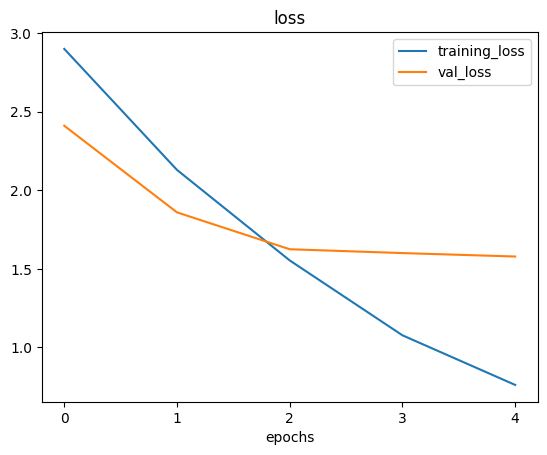

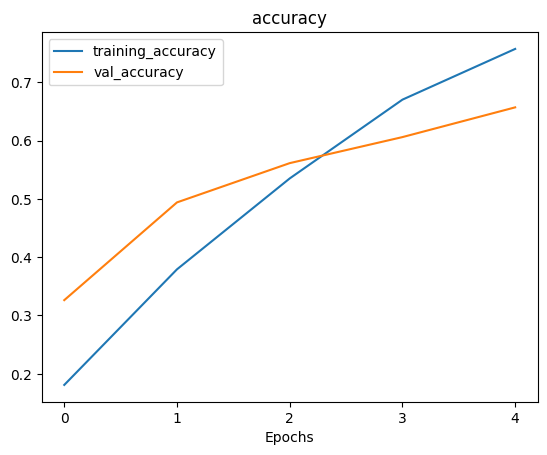

In [ ]:
plot_loss_curves(history)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_augmented = ImageDataGenerator(rescale = 1./255,
                                          rotation_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip=True,
                                          vertical_flip=True)

In [ ]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_data_augmented = train_data_augmented.flow_from_directory(train_dir,
                                                                target_size=IMG_SIZE,
                                                                class_mode="categorical",
                                                                batch_size=BATCH_SIZE,
                                                                shuffle=True,
                                                                seed=42)

valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=IMG_SIZE,
                                               class_mode="categorical",
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=IMG_SIZE,
                                               class_mode="categorical",
                                               seed=42)

Found 21000 images belonging to 30 classes.
Found 3000 images belonging to 30 classes.
Found 6000 images belonging to 30 classes.


In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Input, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
model_1 = Sequential([
    Input(shape=(224,224,3)),
    Conv2D(64, 8, strides=3, activation="relu",padding="same", kernel_initializer="he_normal"),
    MaxPool2D(pool_size=2),
    Conv2D(128, 3, activation="relu",padding="valid", kernel_initializer="he_normal"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation = "relu", kernel_initializer="he_normal"),
    Dropout(0.5),
    Dense(30, activation="softmax")
])

In [ ]:
model_1.compile(loss="categorical_crossentropy", optimizer = Adam(), metrics = ["accuracy"])

In [ ]:
history1 = model_1.fit(train_data_augmented, epochs=5, validation_data = test_data)

Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 281s 419ms/step - accuracy: 0.0493 - loss: 3.5277 - val_accuracy: 0.1483 - val_loss: 2.8693
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 277s 417ms/step - accuracy: 0.1431 - loss: 2.9126 - val_accuracy: 0.2347 - val_loss: 2.5749
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 278s 418ms/step - accuracy: 0.2026 - loss: 2.7165 - val_accuracy: 0.2717 - val_loss: 2.4735
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 321s 417ms/step - accuracy: 0.2187 - loss: 2.6444 - val_accuracy: 0.2945 - val_loss: 2.3694
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 336s 440ms/step - accuracy: 0.2374 - loss: 2.5695 - val_accuracy: 0.3080 - val_loss: 2.3212


In [ ]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 75, 75, 64)          │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 35, 35, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,475,548 (55.22 MB)

 Trainable params: 4,825,182 (18.41 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,650,366 (36.81 MB)

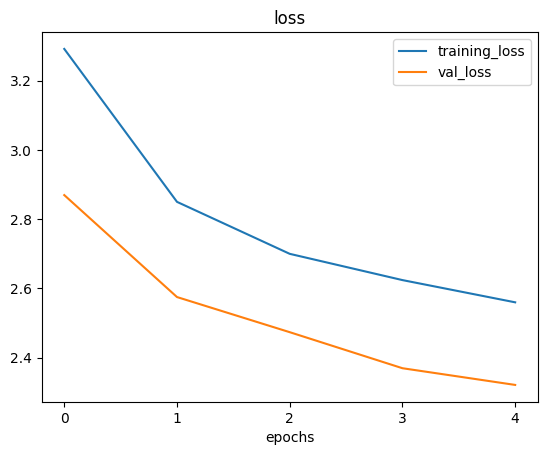

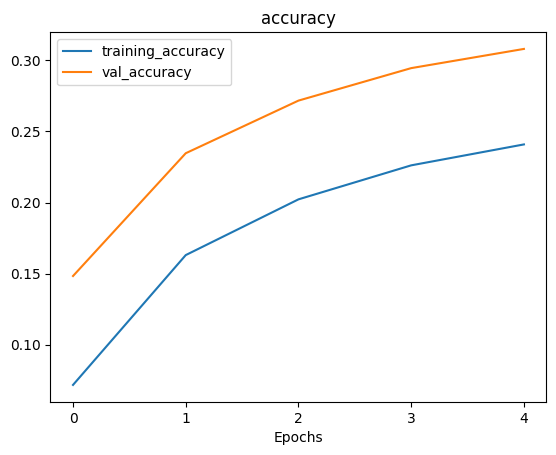

In [ ]:
plot_loss_curves(history1)